In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

summer_observations = pd.read_json('/Users/physarah/Desktop/LAB_BRDF.json',lines=True)
winter_observations = pd.read_json('/Users/physarah/Desktop/LAB_BRDF_winter_time22222.json',lines=True)

In [88]:
summer_observations = summer_observations[summer_observations['magnitude']< 12.5]
winter_observations = winter_observations[winter_observations['magnitude']< 12.5]

summer_observations_high = summer_observations[summer_observations['sat_altitude']> 20]
winter_observations_high= winter_observations[winter_observations['sat_altitude']> 20]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Local Time')

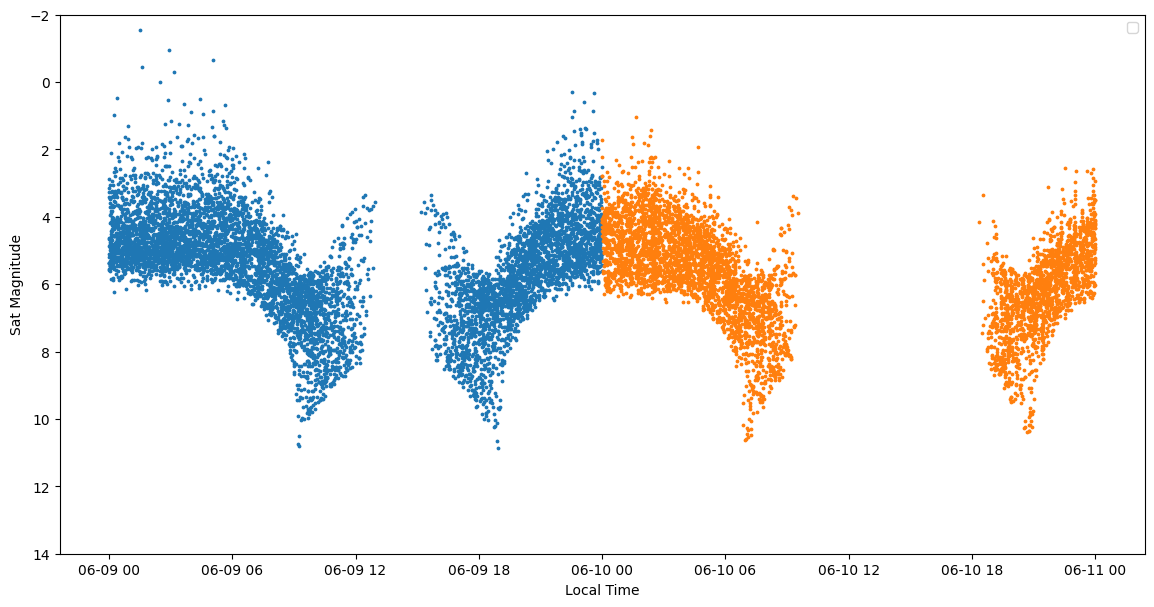

In [72]:
plt.figure(figsize=(14,7))
plt.scatter(y=summer_observations['magnitude'], x=pd.to_datetime(summer_observations['times']) + timedelta(hours = 24*5*30 + 24), s = 3)
plt.scatter(y=winter_observations['magnitude'], x=pd.to_datetime(winter_observations['times']) + timedelta(hours = 0), s = 3)

# plt.axvline(datetime(year = 2024, month = 6, day = 10, hour = 20, minute=10), color = 'black')
# plt.axvline(datetime(year = 2024, month = 6, day = 11, hour = 5, minute=55), color = 'black', label = 'Sun Set')
# plt.axvline(datetime(year = 2024, month = 6, day = 11, hour = 3, minute=55), color = 'blue')
# plt.axvline(datetime(year = 2024, month = 6, day = 10, hour = 22, minute=55), color = 'blue', label = 'Twilight')
# plt.xlim(datetime(year = 2024, month = 6, day = 10, hour = 10, minute=30),
#         datetime(year = 2024, month = 6, day = 11, hour = 12, minute=0))
plt.legend()
plt.ylim(14,-2)
plt.ylabel("Sat Magnitude")
plt.xlabel("Local Time")

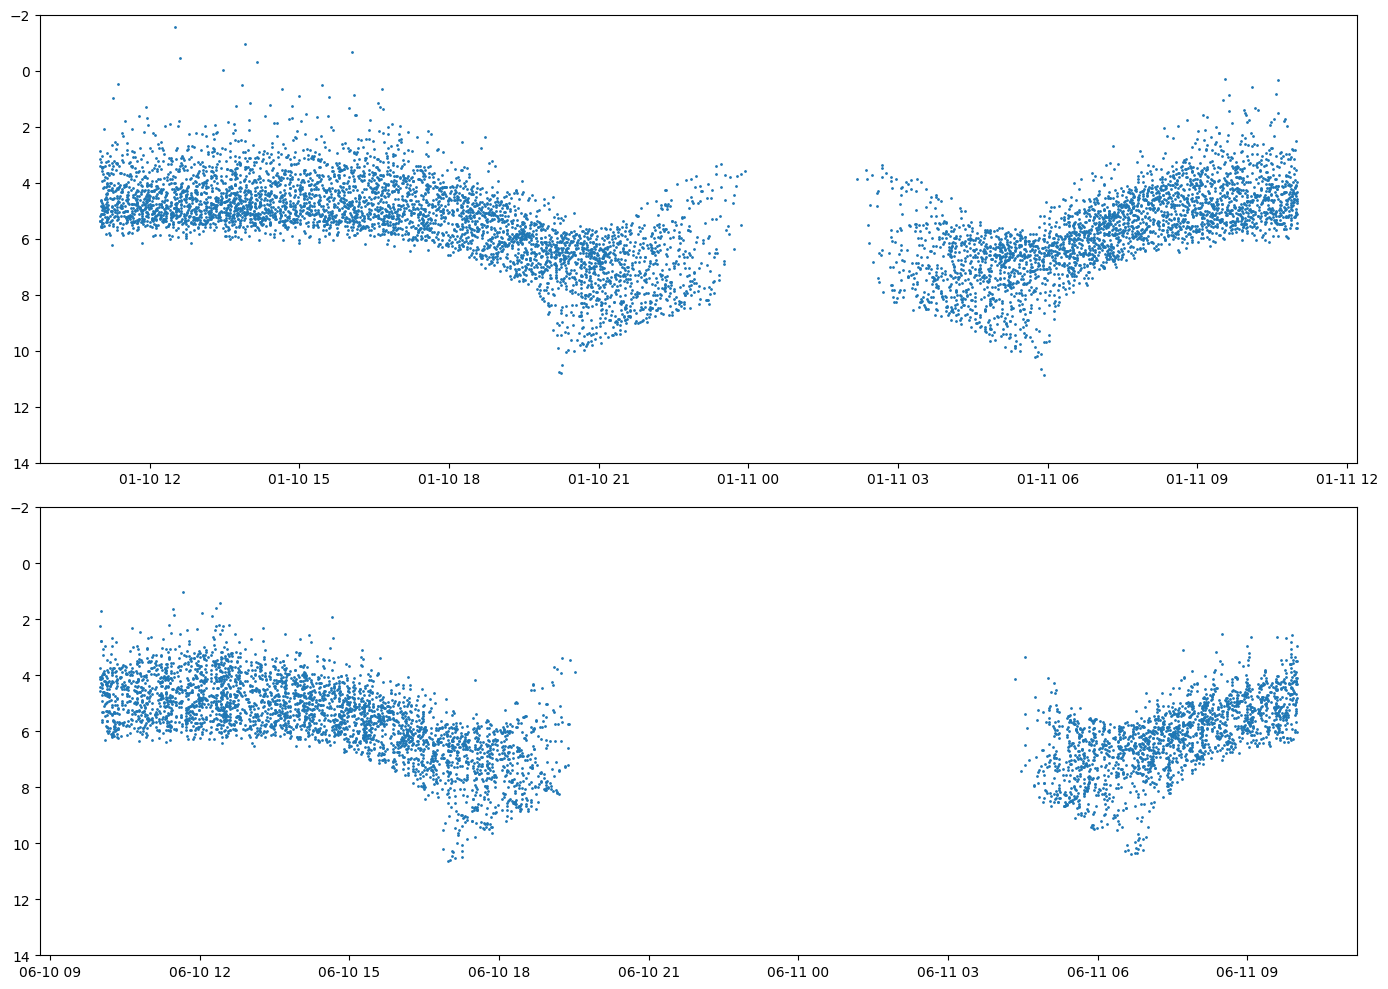

In [73]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (14,10))
# Create the first subplot (upper panel)
plt.subplot(2, 1, 1)
plt.scatter(y=summer_observations['magnitude'], x=pd.to_datetime(summer_observations['times']) + timedelta(hours = 11), s = 1)
plt.ylim(14, -2)

# Create the second subplot (lower panel)
plt.subplot(2, 1, 2)
plt.scatter(y=winter_observations['magnitude'], x=pd.to_datetime(winter_observations['times']) + timedelta(hours = 10), s = 1)
plt.ylim(14, -2)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

(array([   4.,   14.,   72.,  414., 1675., 2819., 1543.,  686.,  270.,
          38.]),
 array([-1.55421153, -0.31181595,  0.93057963,  2.17297521,  3.41537079,
         4.65776637,  5.90016195,  7.14255753,  8.38495311,  9.62734869,
        10.86974428]),
 <BarContainer object of 10 artists>)

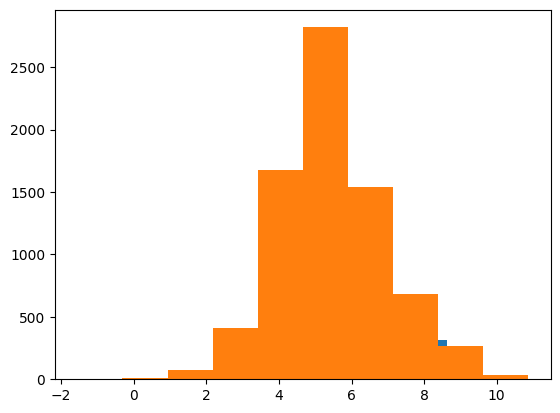

In [52]:
plt.hist(winter_observations['magnitude'])
plt.hist(summer_observations['magnitude'])

(array([  7.,  16.,  44., 279., 361., 277., 213., 132.,  50.,  22.]),
 array([ 3.36277236,  4.08826723,  4.8137621 ,  5.53925697,  6.26475184,
         6.99024671,  7.71574158,  8.44123644,  9.16673131,  9.89222618,
        10.61772105]),
 <BarContainer object of 10 artists>)

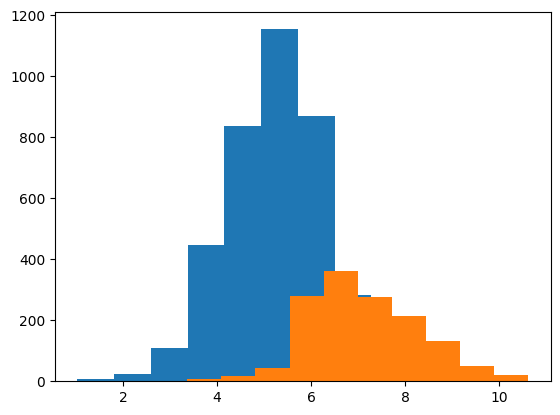

In [74]:
winter_day = winter_observations[winter_observations['sun_altitude']>0]
winter_night = winter_observations[winter_observations['sun_altitude']<=0]
plt.hist(winter_day['magnitude'])
plt.hist(winter_night['magnitude'])

73.76244193762443
26.237558062375584
73.25825539225043
26.741744607749567


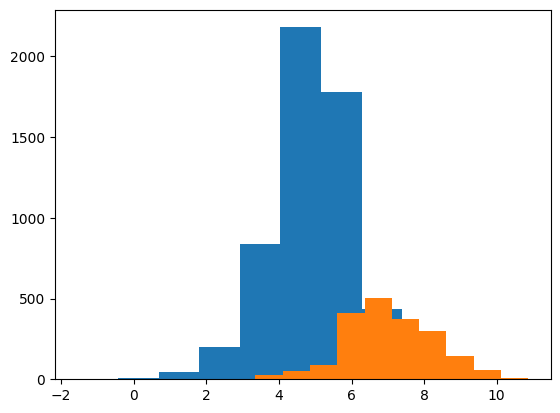

In [81]:
summer_day = summer_observations[summer_observations['sun_altitude']>0]
summer_night = summer_observations[summer_observations['sun_altitude']<=0]
plt.hist(summer_day['magnitude'])
plt.hist(summer_night['magnitude'])

print(len(summer_day['magnitude'])/len(summer_observations['magnitude']) * 100)
print(len(summer_night['magnitude'])/len(summer_observations['magnitude']) * 100)


print(len(winter_day['magnitude'])/len(winter_observations['magnitude']) * 100)
print(len(winter_night['magnitude'])/len(winter_observations['magnitude']) * 100)




In [86]:
print(np.median(summer_day['magnitude'])/np.median(summer_night['magnitude']))
print(np.median(winter_day['magnitude'])/np.median(winter_night['magnitude']))


0.717199967509276
0.7575256015332432


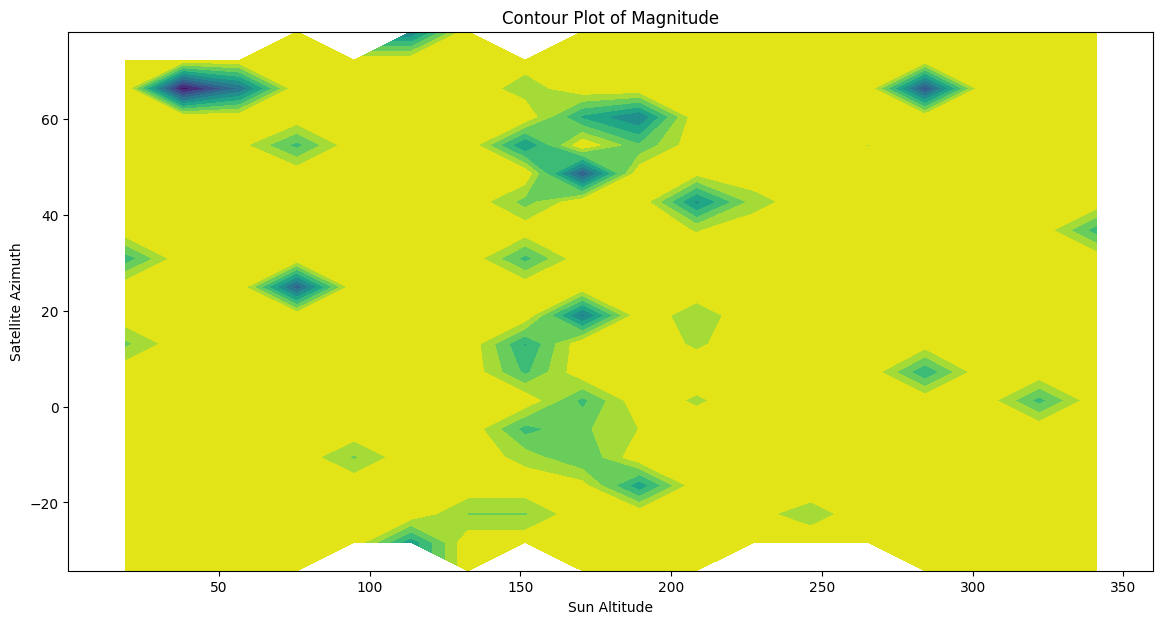

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Assuming outs is a DataFrame with columns 'sun_altitude', 'sat_azimuth', and 'magnitude'
y = outs['sun_altitude']
x = outs['sat_azimuth']
z = outs['magnitude']

# Define a regular grid
xi = np.linspace(x.min(), x.max(), 20)
yi = np.linspace(y.min(), y.max(), 20)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data onto the regular grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot the filled contour map
plt.figure(figsize=(14, 7))
contour_filled = plt.contourf(xi, yi, zi, levels=10, cmap='viridis')


# Adding a colorbar
cbar = plt.colorbar(contour, label='Magnitude')

# Adding labels and title
plt.xlabel('Sun Altitude')
plt.ylabel('Satellite Azimuth')
plt.title('Contour Plot of Magnitude')

# Show the plot
plt.show()

In [135]:
#dark = outs[outs['sun_altitude']<-18]
day = outs2[outs2['sun_altitude']>0]
civil = outs2[(outs2['sun_altitude']<0) & (outs2['sun_altitude']>-6)]
nautical = outs2[(outs2['sun_altitude']<-6) & (outs2['sun_altitude']>-12)]
astro = outs2[(outs2['sun_altitude']<-6) & (outs2['sun_altitude']>-12)]
night = outs2[(outs2['sun_altitude']<-12)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Local Time')

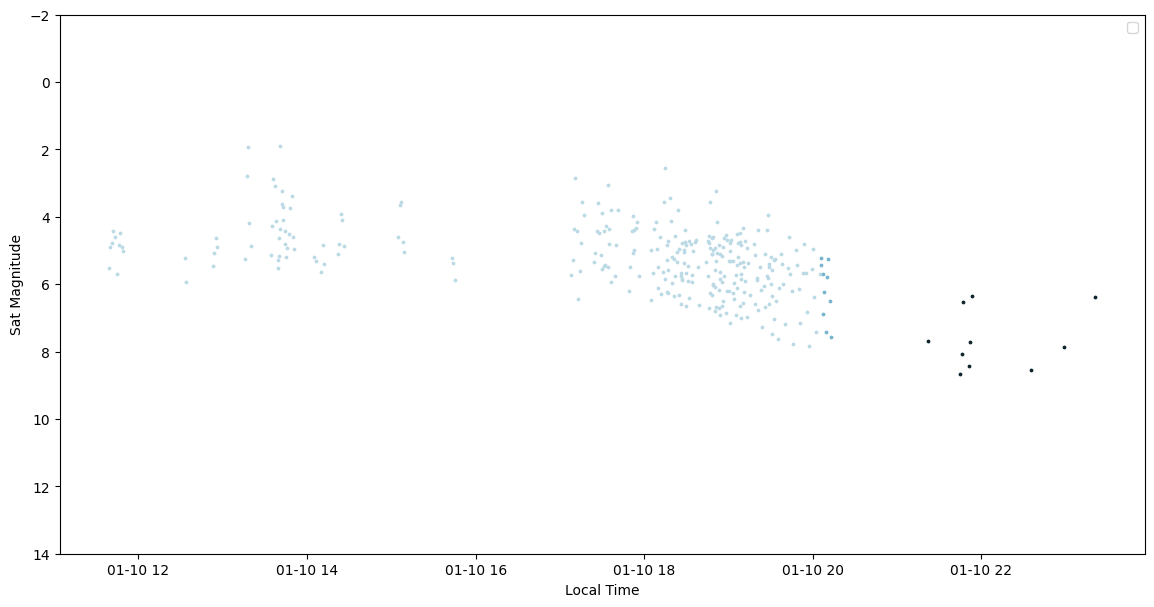

In [136]:
plt.figure(figsize=(14,7))
plt.scatter(y=day['magnitude'], x=pd.to_datetime(day['times']) + timedelta(hours = 11), s = 3, color = '#BCDAE5')
plt.scatter(y=civil['magnitude'], x=pd.to_datetime(civil['times']) + timedelta(hours = 11), s = 3, color = '#79B5CC')
plt.scatter(y=nautical['magnitude'], x=pd.to_datetime(nautical['times']) + timedelta(hours = 11), s = 3, color = '#3C6475')
plt.scatter(y=astro['magnitude'], x=pd.to_datetime(astro['times']) + timedelta(hours = 11), s = 3, color = '#1E3D4B')
plt.scatter(y=night['magnitude'], x=pd.to_datetime(night['times']) + timedelta(hours = 11), s = 3, color = '#10262F')

plt.legend()
plt.ylim(14,-2)
plt.ylabel("Sat Magnitude")
plt.xlabel("Local Time")

/var/folders/8p/5731jz1n2rb34n99zjc89td80000gn/T/ipykernel_13374/3388090003.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outs2 = outs2[outs['sat_altitude']>20]


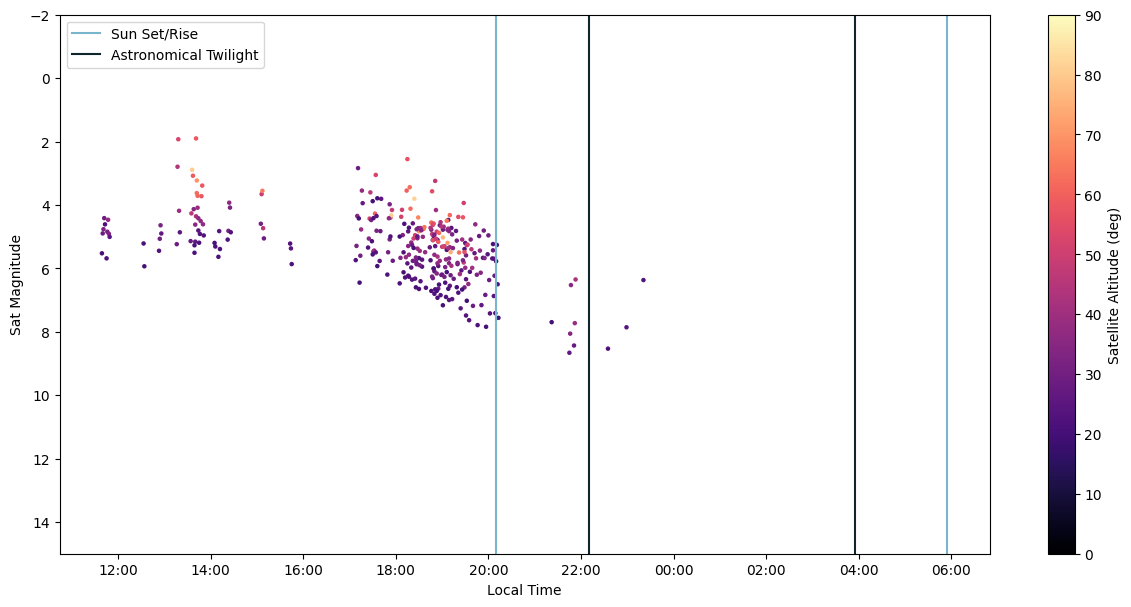

In [137]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.dates as mdates
from datetime import datetime


color5 = '#BCDAE5'  
color4 = '#79B5CC'  
color3 = '#3C6475'  
color2 = '#1E3D4B'
color1 = '#10262F'

colors = [color1, color2, color3, color4, color5, color5]
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)


outs2 = outs[outs['magnitude']!=12.5]
outs2 = outs2[outs['sat_altitude']>20]

plt.figure(figsize=(15,7))
plt.scatter(y=outs2['magnitude'], x=pd.to_datetime(outs2['times']) + timedelta(hours = 11), s = 5, 
            c = outs2['sat_altitude'], cmap = 'magma')
plt.axvline(datetime(year = 2024, month = 1, day = 10, hour = 20, minute=10), color = '#79B5CC' )
plt.axvline(datetime(year = 2024, month = 1, day = 11, hour = 5, minute=55), color = '#79B5CC' , label = 'Sun Set/Rise')
plt.axvline(datetime(year = 2024, month = 1, day = 11, hour = 3, minute=55), color = '#10262F')
plt.axvline(datetime(year = 2024, month = 1, day = 10, hour = 22, minute=10), color = '#10262F', label = 'Astronomical Twilight')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Adjust the format as needed
 


plt.colorbar(label = "Satellite Altitude (deg)")
plt.clim(0,90)
plt.legend()
plt.ylim(15,-2)
plt.ylabel("Sat Magnitude")
plt.xlabel("Local Time")
plt.savefig("/Users/physarah/Desktop/update_fig3.png")

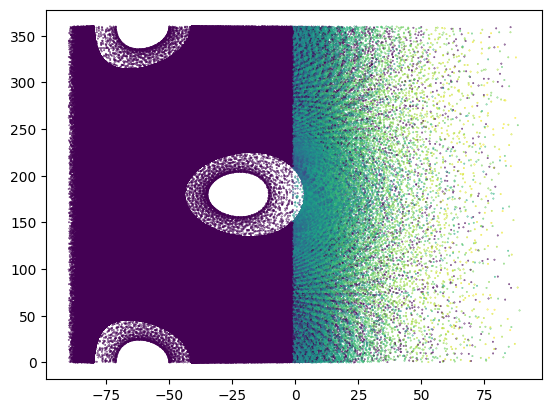

In [131]:
plt.scatter(outs['sat_altitude'], outs['sat_azimuth'], s = 0.1, c = -outs['magnitude'])